In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_helpers import load_data, clean_data 
from chart_helpers import (plot_for_region, stats_for_region, 
    plot_growth_factor_for_region, plot_cfr_for_region,
    growth_factor_stats_for_region)

plt.style.use('seaborn-darkgrid')

In [30]:
# Data for confirmed cases, deaths and recovered instances  
# is separated into three files for this data repo:
DATA_BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv'

COUNTRY = 'Germany'

In [3]:
raw_data = load_data(DATA_BASE_URL)
data = {key: clean_data(df) for key, df in raw_data.items()}

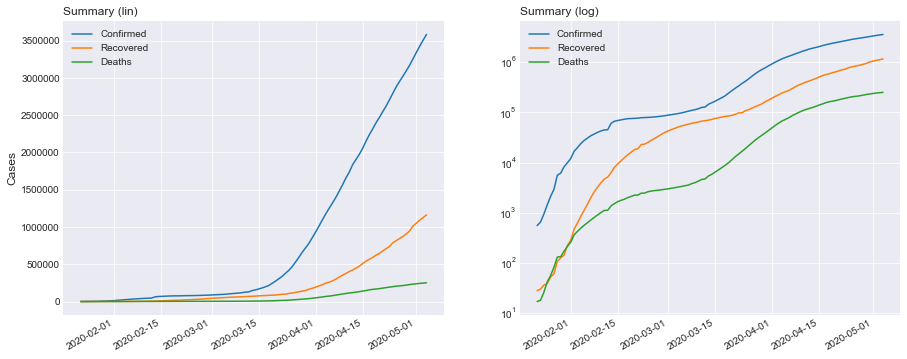

In [22]:
plot_for_region(data, region='Global')

In [23]:
stats_for_region(data, 'Global')

,Confirmed,Recovered,Deaths
Global,"3,583,055","1,162,724","251,537"


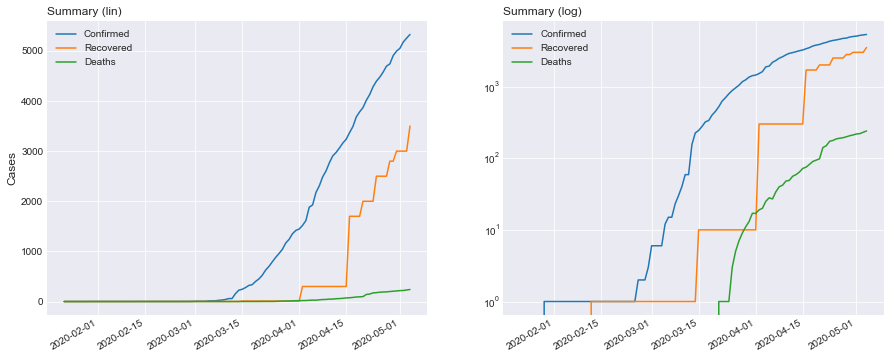

In [24]:
plot_for_region(data, COUNTRY)

In [25]:
stats_for_region(data, COUNTRY)

,Confirmed,Recovered,Deaths
Finland,"5,327","3,500",240


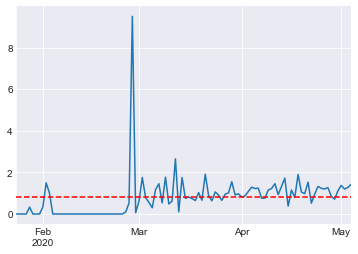

In [35]:
plot_growth_factor_for_region(data, COUNTRY)

In [36]:
growth_factor_stats_for_region(data, COUNTRY)

,Current,Mean
Germany,1.428279,0.805666


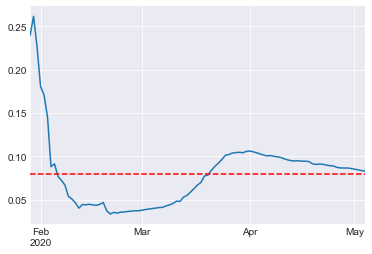

In [34]:
plot_cfr_for_region(data, 'Global', t=7)

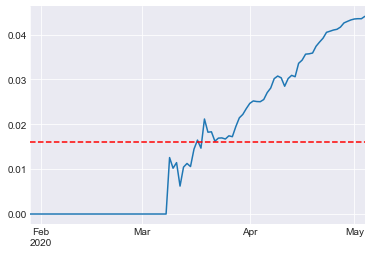

In [32]:
plot_cfr_for_region(data, COUNTRY, t=7)